In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_seq_items = 2000

# import python modules
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/tabea/Documents/UrbanMobility/src')
from models import random_forest_model as model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Random Forest

### Data Preparation

In [5]:
journey_16 = pd.read_csv('../data/processed/agg_journey_data_2016.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_17 = pd.read_csv('../data/processed/agg_journey_data_2017.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_18 = pd.read_csv('../data/processed/agg_journey_data_2018.csv', parse_dates=['end_date', 'start_date'], index_col=0)
journey_19 = pd.read_csv('../data/processed/agg_journey_data_2019.csv', parse_dates=['end_date', 'start_date'], index_col=0)

In [23]:
journey_train = pd.concat([journey_16, journey_17, journey_18])
journey_test = journey_19.copy()

In [26]:
x_train, y_train, x_test, y_test = model.train_test_split(journey_train, journey_test)

In [53]:
print("Shape x_train and y_train",  x_train.shape, y_train.shape)

Shape x_train and y_train (305404, 106) (305404,)


In [28]:
x_train.head()

,day_of_week,hour,is_weekend,part_of_day,month,season,bank_holiday,tempmax,tempmin,temp,...,start_borough_Hackney,start_borough_Hammersmith and Fulham,start_borough_Islington,start_borough_Kensington and Chelsea,start_borough_Lambeth,start_borough_Newham,start_borough_Southwark,start_borough_Tower Hamlets,start_borough_Wandsworth,start_borough_Westminster
0,4,0,0.0,5,1.0,4,1.0,8.6,2.6,5.9,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0.0,5,1.0,4,1.0,8.6,2.6,5.9,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0.0,5,1.0,4,1.0,8.6,2.6,5.9,...,1,0,0,0,0,0,0,0,0,0
3,4,0,0.0,5,1.0,4,1.0,8.6,2.6,5.9,...,0,1,0,0,0,0,0,0,0,0
4,4,0,0.0,5,1.0,4,1.0,8.6,2.6,5.9,...,0,0,1,0,0,0,0,0,0,0


In [30]:
y_train.head()

0    60
1    69
2    14
3    22
4    11
Name: demand, dtype: int64

### Model 1: Random Forest, with hyperparameter tuning

In [32]:
# fit and predict model with default paramters
rf, y_pred = model.random_forest_fit_pred(x_train, y_train, x_test)

In [40]:
# feature importance
print(model.get_feature_importance(rf, x_train).to_string())

                                       Feature  Importance
1                                         hour    0.415429
19                                day_of_month    0.064182
21                         bike_station_counts    0.046251
22                           bike_docks_counts    0.042768
7                                      tempmax    0.031840
76               residence_lengh_uk_born_ratio    0.026679
50                              health_1_ratio    0.025475
0                                  day_of_week    0.024933
58                         crime_offences_rate    0.024241
39                     religion_buddhist_ratio    0.023719
3                                  part_of_day    0.022955
36                     ethnic_arab_other_ratio    0.020705
105                  start_borough_Westminster    0.020640
2                                   is_weekend    0.016974
18                              daylight_hours    0.016285
12                                      precip    0.0156

In [34]:
# evaluation metrics
rmse, mae, r2 = model.evaluation_metrics(y_test, y_pred)

print('RMSE:', rmse)
print('MAE:', mae)
print('R2 Score:', r2)

RMSE: 53.82074586057536
MAE: 26.26859589545281
R2 Score: 0.8495282720765511


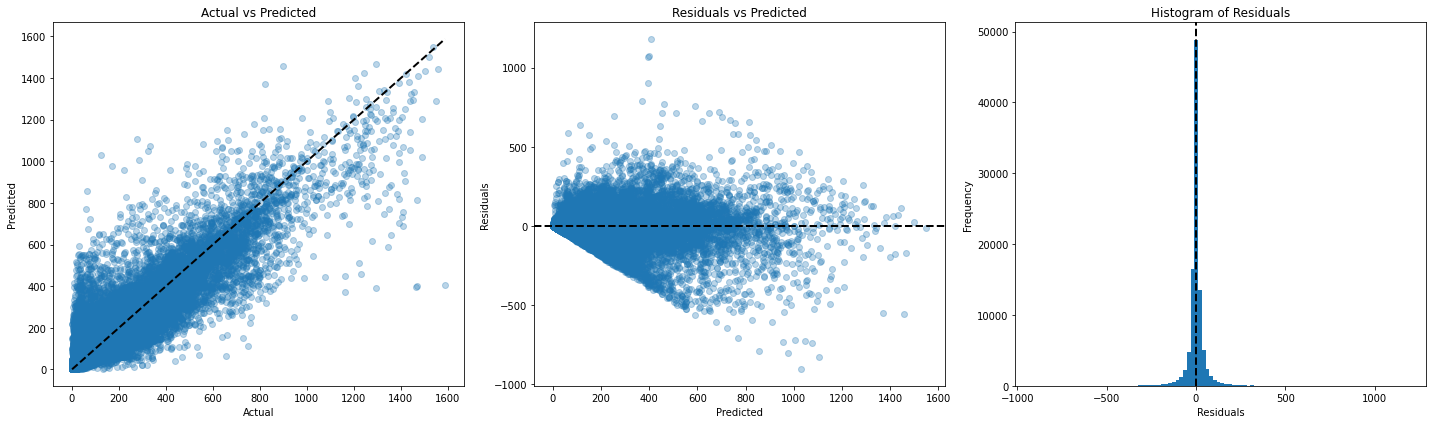

In [44]:
# evaluation visualisation
model.evaluation_vis(y_test, y_pred)

In [66]:
journey_train.head()

,start_date_hour,start_borough,rental_id,end_date,end_station_name,start_date,start_station_name,day_of_week,hour,is_weekend,...,start_borough_Hackney,start_borough_Hammersmith and Fulham,start_borough_Islington,start_borough_Kensington and Chelsea,start_borough_Lambeth,start_borough_Newham,start_borough_Southwark,start_borough_Tower Hamlets,start_borough_Wandsworth,start_borough_Westminster
0,2016-01-01 00:00:00,Camden,50608184.0,2016-01-01 01:14:00,"Hampstead Road (Cartmel), Euston",2016-01-01 00:00:00,"Hampstead Road, Euston",4,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-01 00:00:00,City of London,50608194.0,2016-01-01 00:33:00,"Macclesfield Rd, St Lukes",2016-01-01 00:07:00,"Lower Thames Street, Monument",4,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-01 00:00:00,Hackney,50608191.0,2016-01-01 00:29:00,"Holborn Circus, Holborn",2016-01-01 00:06:00,"Shoreditch High Street, Shoreditch",4,0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,2016-01-01 00:00:00,Hammersmith and Fulham,50608213.0,2016-01-01 00:44:00,"Normand Park, West Kensington",2016-01-01 00:10:00,"Humbolt Road, Fulham",4,0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,2016-01-01 00:00:00,Islington,50608274.0,2016-01-01 00:48:00,"Dunston Road , Haggerston",2016-01-01 00:16:00,"Islington Green, Angel",4,0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [65]:



boroughs = ['Westminster']

borough_data = {}

for borough in boroughs:
    model.evaluation_actual_vs_predicted(journey_train, journey_test, borough)

       start_date_hour           start_borough   rental_id  \
0  2016-01-01 00:00:00                  Camden  50608184.0   
1  2016-01-01 00:00:00          City of London  50608194.0   
2  2016-01-01 00:00:00                 Hackney  50608191.0   
3  2016-01-01 00:00:00  Hammersmith and Fulham  50608213.0   
4  2016-01-01 00:00:00               Islington  50608274.0   

             end_date                  end_station_name          start_date  \
0 2016-01-01 01:14:00  Hampstead Road (Cartmel), Euston 2016-01-01 00:00:00   
1 2016-01-01 00:33:00         Macclesfield Rd, St Lukes 2016-01-01 00:07:00   
2 2016-01-01 00:29:00           Holborn Circus, Holborn 2016-01-01 00:06:00   
3 2016-01-01 00:44:00     Normand Park, West Kensington 2016-01-01 00:10:00   
4 2016-01-01 00:48:00         Dunston Road , Haggerston 2016-01-01 00:16:00   

                   start_station_name  day_of_week  hour  is_weekend  ...  \
0              Hampstead Road, Euston            4     0         0.0  ...  

KeyError: 'start_date'

In [47]:
df_errors, df_errors_entries = model.get_enornous_entrie(y_test, y_pred, all)
df_errors.head()

AttributeError: 'builtin_function_or_method' object has no attribute 'loc'

In [507]:
df_errors_entries.head()

,day_of_week,hour,is_weekend,part_of_day,month,season,bank_holiday,tempmax,tempmin,temp,...,start_borough_Hackney,start_borough_Hammersmith and Fulham,start_borough_Islington,start_borough_Kensington and Chelsea,start_borough_Lambeth,start_borough_Newham,start_borough_Southwark,start_borough_Tower Hamlets,start_borough_Wandsworth,start_borough_Westminster
96237,1,17,0.0,4,12.0,4,0.0,11.6,1.6,7.4,...,0,0,0,0,0,0,0,0,0,1
100411,2,16,0.0,3,12.0,4,1.0,9.1,2.5,5.7,...,0,0,0,0,0,0,0,0,0,1
100399,2,15,0.0,3,12.0,4,1.0,9.1,2.5,5.7,...,0,0,0,0,0,0,0,0,0,1
96249,1,18,0.0,4,12.0,4,0.0,11.6,1.6,7.4,...,0,0,0,0,0,0,0,0,0,1
100387,2,14,0.0,3,12.0,4,1.0,9.1,2.5,5.7,...,0,0,0,0,0,0,0,0,0,1


In [61]:
# hyperparameter tuning
cv_results = model.hyper_param_tuning(x_train, y_train)

# print or log all tried parameters and their scores
print(cv_results[['params', 'mean_test_score', 'rank_test_score']])

# predict on the test set using the best model
y_pred_best = cv_results.best_estimator_.predict(x_test)

# evaluation metrics
rmse, mae, r2 = model.evaluation_metrics(y_test, y_pred_best)

print('RMSE:', rmse)
print('MAE:', mae)
print('R2 Score:', r2)

/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tabea/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also

KeyboardInterrupt: 

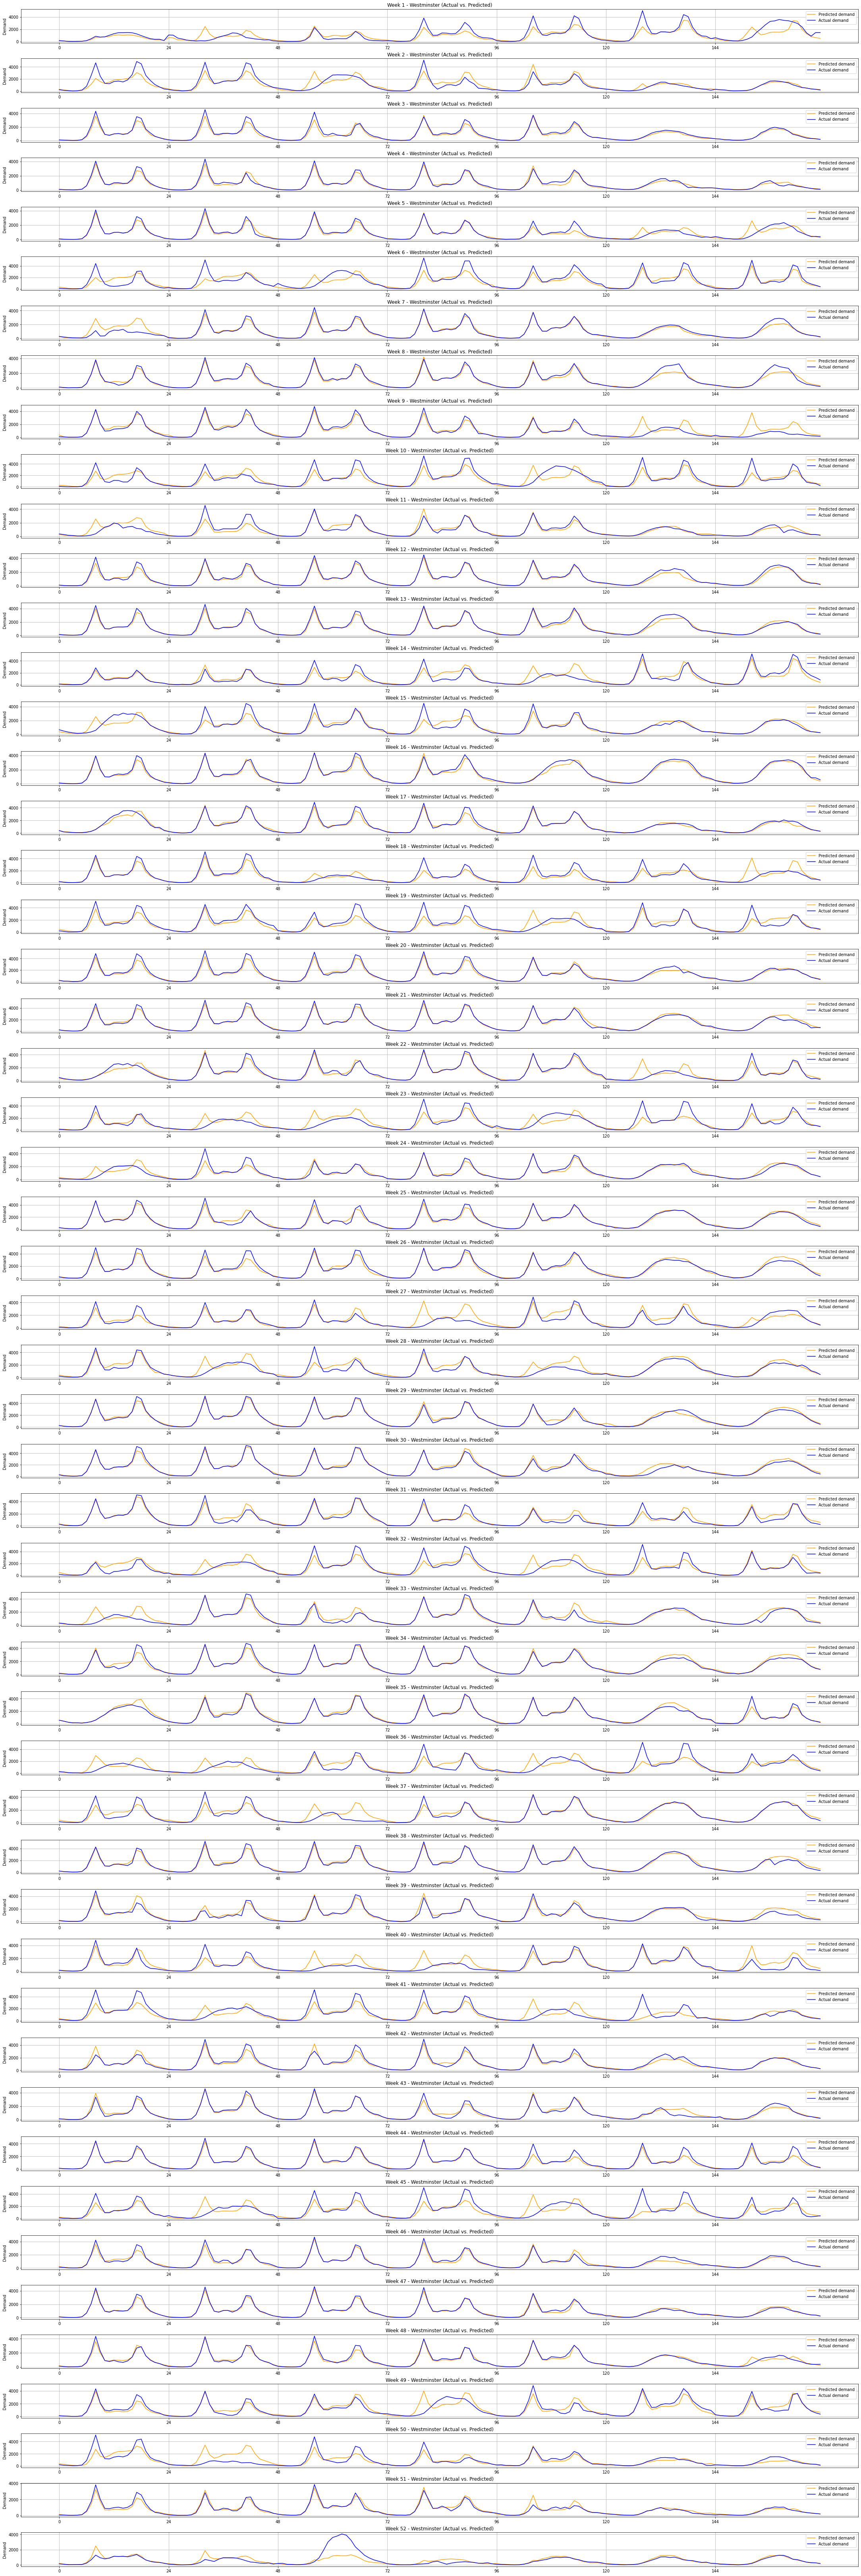

In [ ]:
boroughs = ['Westminster']

borough_data = {}

for borough in boroughs:
    model.evaluation_actual_vs_predicted(y_test, y_pred, journey_test, borough)

### Model: Random Forest, Log-Transformed

In [361]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Apply a log transformation to the target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Fit the model on the transformed target
rf.fit(x_train, y_train_log)

# Predict on the test set
y_pred_log = rf.predict(x_test)

# Since we transformed the target using log1p (log(1 + x)), we need to transform the predictions back to the original scale using expm1 (exp(x) - 1)
y_pred = np.expm1(y_pred_log)

# Calculate updated evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

print('Tuned RMSE:', rmse)
print('Tuned MAE:', mae)
print('Tuned R2 Score:', r2)
print('Tuned Explained Variance Score:', evs)


Tuned RMSE: 99.16506108576655
Tuned MAE: 47.1072112205503
Tuned R2 Score: 0.3430311206231823
Tuned Explained Variance Score: 0.4445946429705847


### Model: Gradient Boosting

In [401]:
gb, y_pred_gb = model.gradient_boosting_fit_pred(x_train, y_train, x_test)

In [402]:
rmse, mae, r2 = model.evaluation_metric(y_test, y_pred_gb)


RMSE: 65.10478974748199
MAE: 36.787428593647725
R2 Score: 0.7798182264900467
Explained Variance Score: 0.7799647453245836


### Model: Random Forest, Stand. Demand

Modeling different borough-level effects:
- Interaction terms between boroughs and other important features
- Hierarchical or mixed-effects models: useful when there are multiple levels of grouping in the data -> these models allow for the estimation of borough-level effects that are partially pooled, meaning they learn from the overall trends in the data but also allow for borough-specific deviations
- Standardization 

In [525]:
x_train_stand, y_train_stand, x_test_stand, y_test_stand, test_all = model.aggregate_demand_hourly(journey_train_18, journey_test_19, standardise=True)

In [526]:
# fit and predict
rf_stand, y_pred_stand = model.random_forest_fit_pred(x_train_stand, y_train_stand, x_test_stand)

In [527]:
# feature importance
print(model.get_feature_importance(rf_stand, x_train_stand))

                                       Feature  Importance
1                                         hour    0.440604
19                                day_of_month    0.080782
7                                      tempmax    0.046634
0                                  day_of_week    0.038324
3                                  part_of_day    0.035379
2                                   is_weekend    0.034302
15                                  cloudcover    0.019292
14                                   windspeed    0.017915
11                                    humidity    0.016351
20                                 day_of_year    0.016086
62                distance_work_5km_10km_ratio    0.014947
18                              daylight_hours    0.014217
8                                      tempmin    0.013503
12                                      precip    0.013420
16                                  visibility    0.012950
59                            business_density    0.0123

In [529]:
# evaluation metrics
rmse_stand, mae_stand, r2_stand = model.evaluation_metrics(y_test_stand, y_pred_stand)

print('RMSE:', rmse_stand)
print('MAE:', mae_stand)
print('R2 Score:', r2_stand)

RMSE: 0.032780155972454324
MAE: 0.01654479913444593
R2 Score: 0.7817375741474


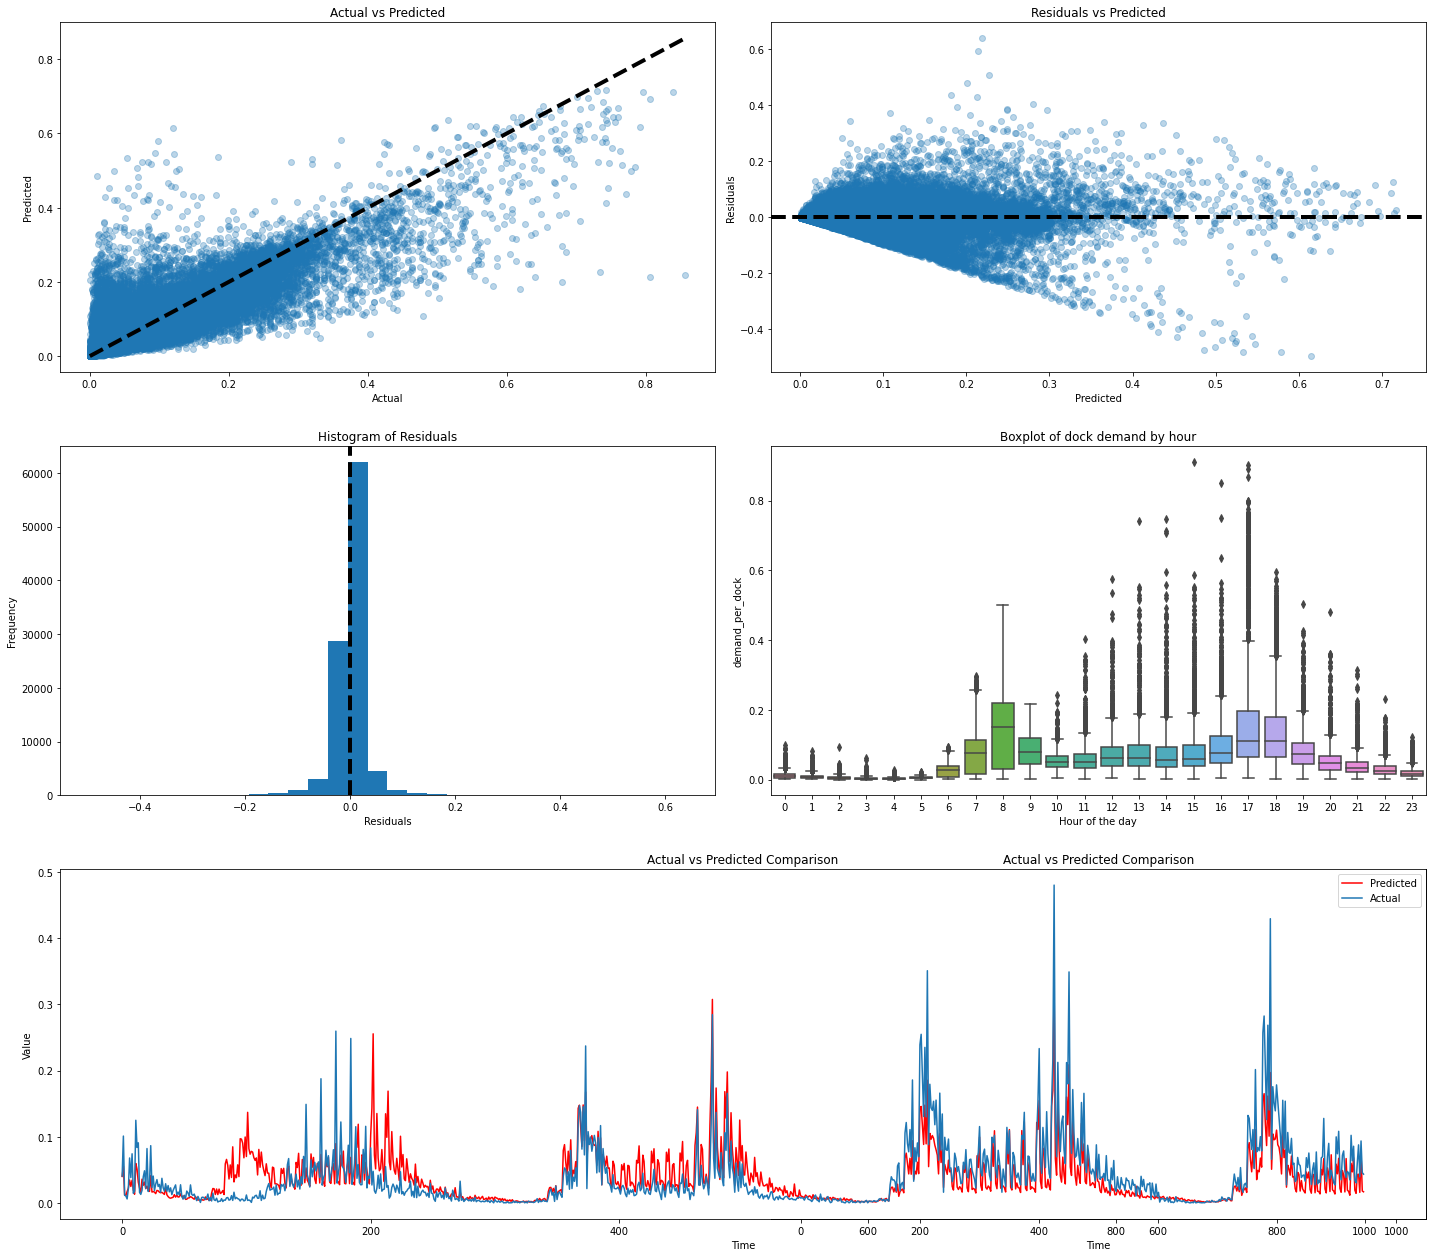

In [533]:
# evaluation visualisation
model.evaluation_vis(y_test_stand, y_pred_stand, test_all)

In [534]:
df_errors_stand, df_errors_entries_stand = model.get_enornous_entrie(y_test_stand, y_pred_stand, test_all)
df_errors_stand.head()

,Actual,Predicted,Error
31199,0.856354,0.218854,0.637500
31187,0.806630,0.214240,0.592390
31211,0.734807,0.227436,0.507371
78632,0.119754,0.614713,0.494959
36245,0.098260,0.578654,0.480394


In [536]:
df_errors_entries_stand.head()

,start_date_hour,start_borough,rental_id,end_date,end_station_name,start_date,start_station_name,day_of_week,hour,is_weekend,...,start_borough_Hammersmith and Fulham,start_borough_Islington,start_borough_Kensington and Chelsea,start_borough_Lambeth,start_borough_Newham,start_borough_Southwark,start_borough_Tower Hamlets,start_borough_Wandsworth,start_borough_Westminster,demand_per_dock
31199,2018-04-23 09:00:00,Kensington and Chelsea,74882399.0,2018-04-23 09:23:00,"Chadwell Street, Angel",2018-04-23 09:00:00,"Denyer Street, Knightsbridge",0,9,0.0,...,0,0,1,0,0,0,0,0,0,0.104539
31187,2018-04-23 08:00:00,Kensington and Chelsea,74877403.0,2018-04-23 08:44:00,"Christopher Street, Liverpool Street",2018-04-23 08:00:00,"Harcourt Terrace, West Brompton",0,8,0.0,...,0,0,1,0,0,0,0,0,0,0.203118
31211,2018-04-23 10:00:00,Kensington and Chelsea,74884935.0,2018-04-23 10:02:00,"Sumner Place, South Kensington",2018-04-23 10:00:00,"South Kensington Station, South Kensington",0,10,0.0,...,0,0,1,0,0,0,0,0,0,0.075653
78632,2018-10-09 03:00:00,Tower Hamlets,80152389.0,2018-10-09 03:11:00,"Shadwell Station, Shadwell",2018-10-09 03:04:00,"Bethnal Green Garden, Bethnal Green",1,3,0.0,...,0,0,0,0,0,0,1,0,0,0.002701
36245,2018-05-11 11:00:00,Lambeth,82004141.0,2018-05-11 11:18:00,"Sedding Street, Sloane Square",2018-05-11 11:02:00,"Kennington Cross, Kennington",4,11,0.0,...,0,0,0,1,0,0,0,0,0,0.042874
